In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
import numpy as np
with open('../Downloads/data.npy', 'rb') as file:
    images = np.load(file)


In [56]:
images[0]

array([[[  0,  34,   0],
        [  0,   0,   0],
        [  0,  36,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,  59]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,  30],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,  43],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,  92],
        [  0,   0,   0],
        [  0,   0,  86]],

       [[  0,   0,  48],
        [  0,   0,   0],
        [111,   0,   0],
        ...,
        [  0,  80,  68],
        [103,   0,   0],
        [117,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [123,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [ 81,   0,  41]]

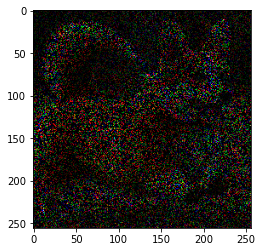

In [3]:
from scipy import misc

#enot = (misc.face() / 255)[:, -768:]

# mox = plt.imread('mox.jpg')[::3, ::3, :] / 255
image = images[0]

plt.imshow(image)
# plt.axis('off')
plt.show()

In [4]:
type(image)

numpy.ndarray

In [5]:
mask = (image[0] == 0)

In [6]:
mask

array([[ True, False,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [ True,  True, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True, False],
       [ True, False, False],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [False,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ T

In [7]:
mask = images[1] == 0

In [8]:
def TVsq_matrix(x: np.ndarray) -> np.ndarray:
  eps = 10 ** -4

  matrix_one_up = np.roll(x, -1, axis=0)
  matrix_one_left = np.roll(x, -1, axis=1)

  diff_i_plus_one = matrix_one_up - x
  diff_j_plus_one = matrix_one_left - x

  return (diff_i_plus_one ** 2 + diff_j_plus_one ** 2) ** 0.5 + eps

def TV(x: np.ndarray) -> float:
  return TVsq_matrix(x).sum()

def dTV(x: np.ndarray, mask) -> np.ndarray:
  matrix_one_up = np.roll(x, -1, axis=0)
  matrix_one_down = np.roll(x, 1, axis=0)
  matrix_one_left = np.roll(x, -1, axis=1)
  matrix_one_right = np.roll(x, 1, axis=1)

  first_term_num = 2 * x - matrix_one_up - matrix_one_left
  second_term_num = x - matrix_one_down
  third_term_num = x - matrix_one_right

  tp_sq = TVsq_matrix(x)
  tp_sq_one_down = np.roll(tp_sq, 1, axis=0)
  tp_sq_one_right = np.roll(tp_sq, 1, axis=1)

  first_term = np.divide(first_term_num, tp_sq)
  second_term = np.divide(second_term_num, tp_sq_one_down)
  third_term = np.divide(third_term_num, tp_sq_one_right)

  return (first_term + second_term + third_term) * mask

In [9]:
class Logger:
  def __init__(self, f):
    self.f = f
    self.calls = 0
    self.log = []

  def __call__(self, *args):
    self.calls += 1
    val = self.f(*args)
    self.log.append(np.linalg.norm(val))
    return val

  def reset(self):
    self.calls = 0
    self.log = []



In [10]:
def gd(f, df, h, x0, mask, niter=300, alpha=0.3, rho=0.8):
  curr_x = np.copy(x0)
  for _ in range(niter):
    curr_val = f(curr_x)
    #print(curr_val)
    curr_d_val = df(curr_x, mask)

    curr_x = curr_x - h * curr_d_val
  return curr_x


CPU times: user 26.4 s, sys: 129 ms, total: 26.5 s
Wall time: 26.5 s


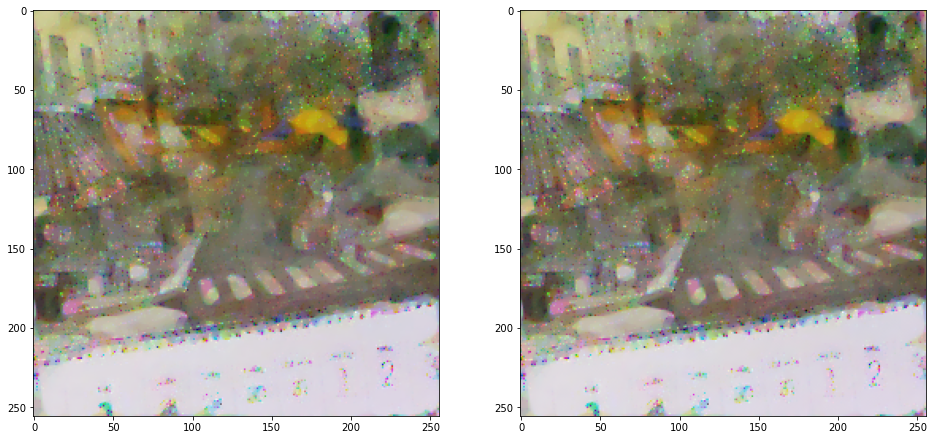

In [17]:
%%time
np.random.seed(228)
# smooth_eps = 1e0

#x0_paint = image * (np.logical_not(corrupted_mask))  # + 0.4 * np.random.random(image.shape) * corrupted_mask

def df_paint(x):
  return dTV(x) * corrupted_mask

lf_paint = Logger(TV)
ldf_paint = Logger(df_paint)

plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.imshow(images[1].astype('float64')/255)

painted = gd(TV, dTV, 0.001, images[1].astype('float64')/255, mask, 10000)

plt.subplot(122)
plt.imshow(painted)

In [18]:
res = []

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


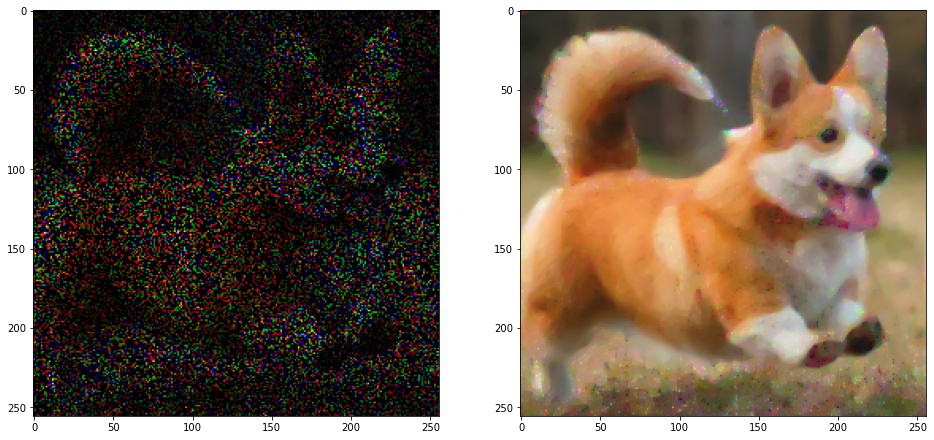

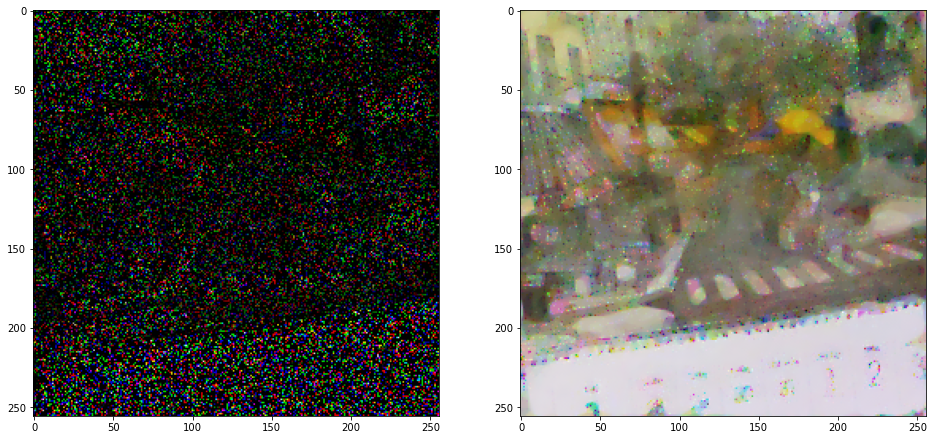

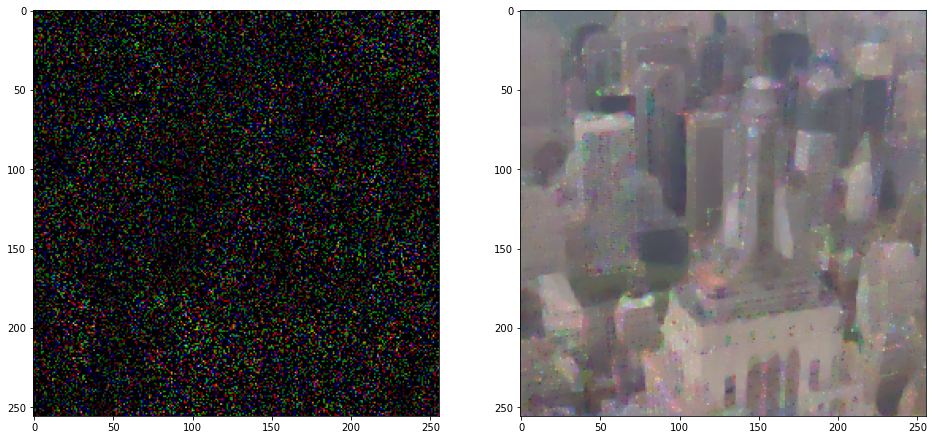

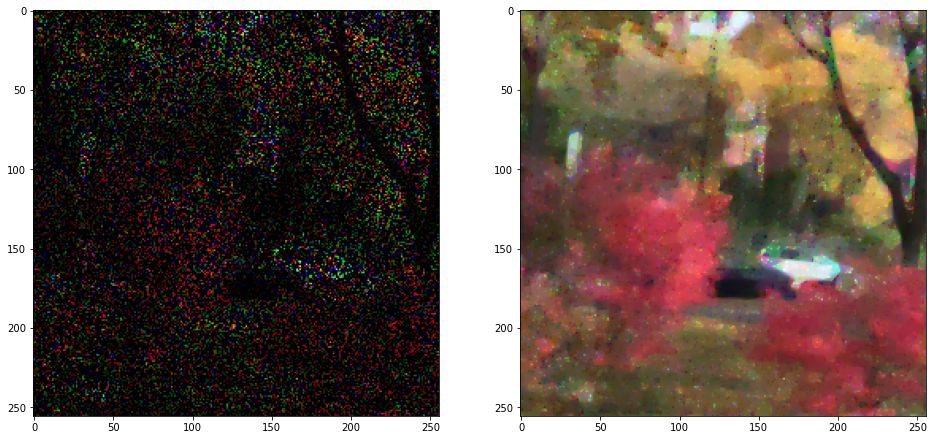

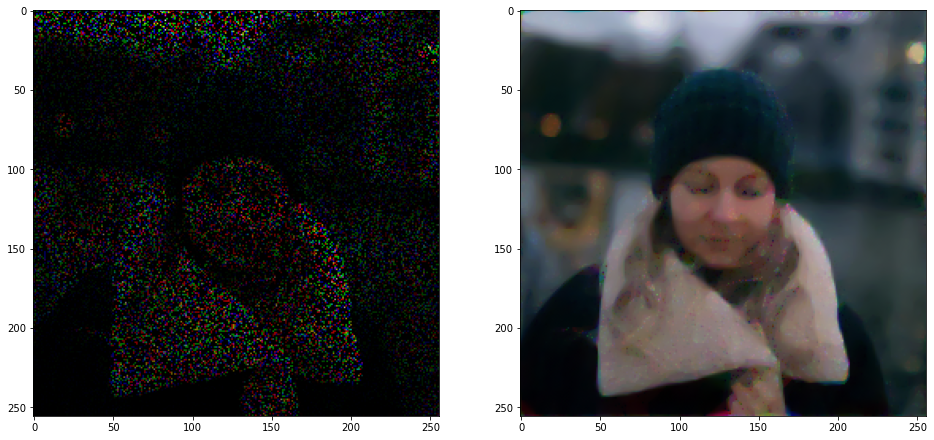

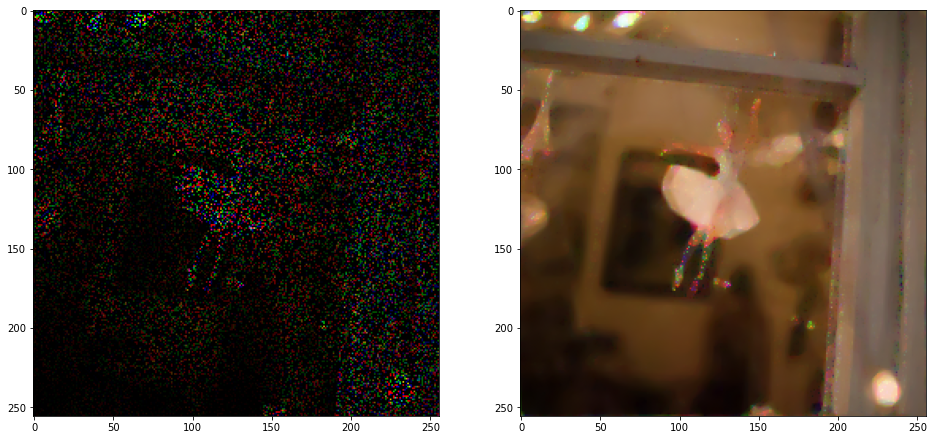

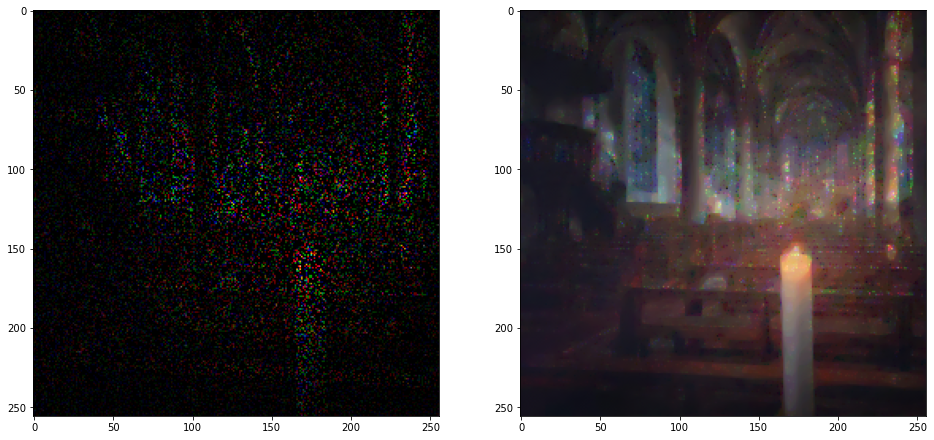

In [62]:
for i in range(len(images)):
    plt.figure(figsize=(16, 8))
    plt.subplot(121)
    plt.imshow(images[i].astype('float64')/255)
    
    mask = images[i] == 0
    painted = gd(TV, dTV, 0.001, images[i].astype('float64')/255, mask, 10000)

    plt.subplot(122)
    plt.imshow(painted)
    res.append((painted * 255).astype(int))

In [77]:
with open('answers.npy', 'wb') as file:
    np.save(file, np.array(res).astype(np.uint8), allow_pickle=False, fix_imports=False)